In [3]:
import json
import os

with open('/content/drive/MyDrive/kaggle.json', 'r') as f:
    kaggle_api_key = json.load(f)

os.environ['KAGGLE_USERNAME'] = kaggle_api_key['username']
os.environ['KAGGLE_KEY'] = kaggle_api_key['key']

Dataset:https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [4]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 19.3MB/s]


In [5]:
!unzip diabetes-dataset.zip

Archive:  diabetes-dataset.zip
  inflating: diabetes.csv            


In [6]:
import pandas as pd

In [47]:
df = pd.read_csv('/content/diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop(['Outcome'],axis=1)
y = df.Outcome
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
import tensorflow as tf
from tensorflow import keras

In [50]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [51]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
# Not Scaled
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
20/20 [==============================] - 1s 16ms/step - loss: 10.4565 - accuracy: 0.5765 - val_loss: 4.7041 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 2.7332 - accuracy: 0.5407 - val_loss: 1.5231 - val_accuracy: 0.6688
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 1.1971 - accuracy: 0.6075 - val_loss: 0.9891 - val_accuracy: 0.6753
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.9701 - accuracy: 0.6254 - val_loss: 0.8454 - val_accuracy: 0.6104
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.8628 - accuracy: 0.6059 - val_loss: 0.7007 - val_accuracy: 0.6494
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.8139 - accuracy: 0.6368 - val_loss: 0.6499 - val_accuracy: 0.7143
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.7443 - accuracy: 0.6564 - val_loss: 0.6934 - val_accuracy: 0.6688
Epoch 8/10
20/20 [

In [53]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test set loss: ", loss)
print("Test set accuracy: ", accuracy)

5/5 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.6948
Test set loss:  0.6364313364028931
Test set accuracy:  0.6948052048683167


In [54]:
# Scaled
model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

Epoch 1/10
20/20 [==============================] - 1s 11ms/step - loss: 0.6113 - accuracy: 0.6824 - val_loss: 0.5746 - val_accuracy: 0.7597
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5819 - accuracy: 0.6857 - val_loss: 0.5422 - val_accuracy: 0.7662
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.6987 - val_loss: 0.5216 - val_accuracy: 0.7792
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5465 - accuracy: 0.7003 - val_loss: 0.5054 - val_accuracy: 0.7857
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5356 - accuracy: 0.7003 - val_loss: 0.4913 - val_accuracy: 0.7857
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5271 - accuracy: 0.7068 - val_loss: 0.4826 - val_accuracy: 0.7922
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.7166 - val_loss: 0.4749 - val_accuracy: 0.7922
Epoch 8/10
20/20 [=

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test set loss: ", loss)
print("Test set accuracy: ", accuracy)

5/5 [==============================] - 0s 3ms/step - loss: 0.9122 - accuracy: 0.6753
Test set loss:  0.912158727645874
Test set accuracy:  0.6753246784210205


Girdi özelliklerini ve hedef sınıfı numpy dizilerine dönüştürme

In [29]:
import numpy as np

In [57]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
20/20 [==============================] - 1s 16ms/step - loss: 6.7119 - accuracy: 0.4886 - val_loss: 3.1166 - val_accuracy: 0.7078
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 2.6192 - accuracy: 0.6091 - val_loss: 1.7444 - val_accuracy: 0.5584
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 1.3845 - accuracy: 0.6401 - val_loss: 1.0573 - val_accuracy: 0.6234
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 1.0688 - accuracy: 0.6531 - val_loss: 0.8912 - val_accuracy: 0.6948
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.9534 - accuracy: 0.6319 - val_loss: 0.8519 - val_accuracy: 0.6364
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.7834 - accuracy: 0.6466 - val_loss: 0.9251 - val_accuracy: 0.5714
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.8473 - accuracy: 0.6238 - val_loss: 0.7924 - val_accuracy: 0.5584
Epoch 8/50
20/20 [=

In [61]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test set loss: ", loss)
print("Test set accuracy: ", accuracy)


5/5 [==============================] - 0s 3ms/step - loss: 0.5528 - accuracy: 0.7597
Test set loss:  0.552802324295044
Test set accuracy:  0.7597402334213257


In [64]:
y_pred1 = model.predict(np.array([[6,	148,	72,	35,	0,	33.6,	0.627,	50]]))
y_pred2 = model.predict(np.array([[1,	85,	66,	29,	0,	26.6,	0.351,	31	]]))

print(y_pred1)
print(y_pred2)
# y_pred1 ciktisi 1 olmaliydi
# y_pred1 ciktisi 0 olmaliydi
# 

1/1 [==============================] - 0s 42ms/step
[[0.7415908]]
[[0.31263843]]


Numpy arrayine cevirdigim zaman cok daha iyi bir sonuc aldim

Sonuc olarak denedigim girdilerde dogru sonuc verdi oranda zaten %75 

# Roc Egrisi

5/5 [==============================] - 0s 3ms/step


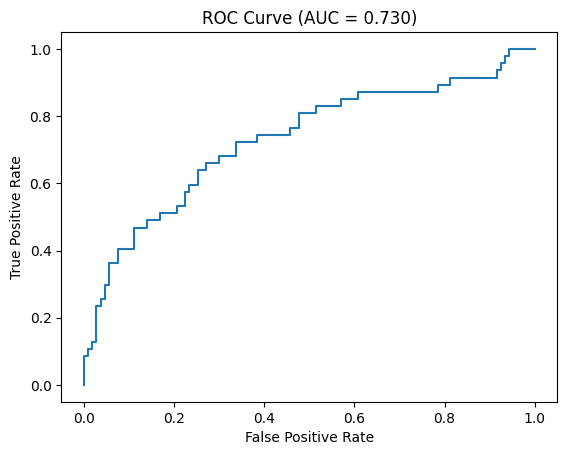

In [69]:
y_pred = model.predict(X_test)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.3f})".format(auc))
plt.show()
